First we have to import the pandas libraries

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

now,making a variable, where im going to store my dataset

Naming my variable as df

from pandas, we have to call,pd.read_csv, then have to copy the link of dataset, along with data file

Asdataset doesnt contain, column name, so we have add it

In [268]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names =["Age","Sex","CP","Trestbps","chol","fbs","Restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

Here 
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. trestbps -  resting blood pressure(in mm Hg on admission to the Hospital
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num-(the predicted attribute) - diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [269]:
df.head()

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


To check bottom 5 data

In [270]:
df.tail()

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


basic information about the dataset

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   CP        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Displays Number of Rows & Columns

In [272]:
print("(Rows, columns): " + str(df.shape))

(Rows, columns): (303, 14)


returns the number of unique values for each variable

In [273]:
df.nunique(axis=0)

Age          41
Sex           2
CP            4
Trestbps     50
chol        152
fbs           2
Restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

Get the count, mean, standard deviation, min, and max for numeric variables

Helps to check wether dataset have null values or not

In [274]:
df.isna().sum()

Age         0
Sex         0
CP          0
Trestbps    0
chol        0
fbs         0
Restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Checking our data set containg duplicate entries or not

In [275]:
df_dup=df.duplicated().any()

In [276]:
df_dup

False

This mean, that our dataset have duplicate values

Now, lets drop the duplicate values

now, we will check there is a good proportion between our positive & negative binary predictor

In [277]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Importing libraries for plotting graph

In [278]:
import seaborn as sns 
import matplotlib.pyplot as plt 

**Correlation Matrix** to find the correlation between them 

whether something is positively or negatively correlated with our predictor (target).

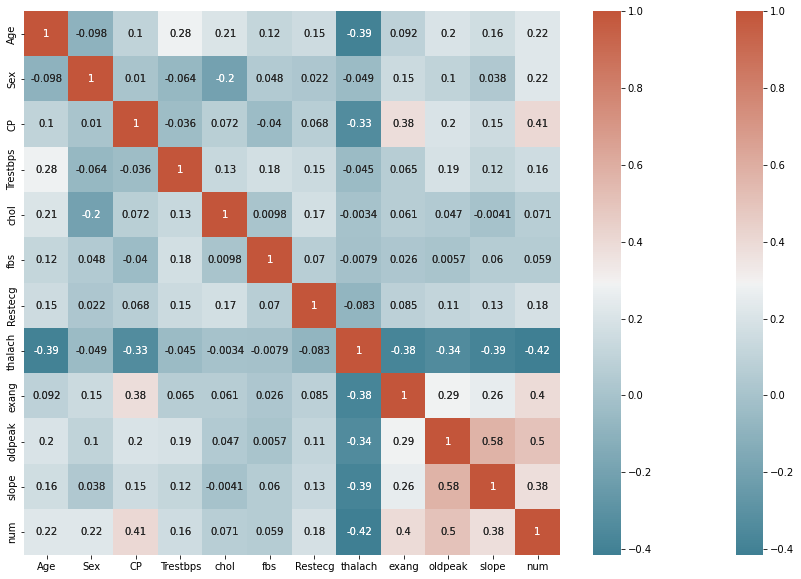

In [279]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

positive correlation - chest pain (cp) & num (our predictor)

negative correlation - angina (exang) & num (our predictor)

**now, we will Filter our data by positive & negative Heart Disease patient**

Filtering data by POSITIVE Heart Disease patient

In [280]:
pos_df = df[df['num']==1]
pos_df.describe()

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,num
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364,1.0
std,8.001136,0.373355,1.004032,18.027980,40.751129,0.262082,0.995613,22.842338,0.502519,0.993389,0.556565,0.0
min,35.000000,0.000000,1.000000,108.000000,149.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,1.0
25%,50.500000,1.000000,3.000000,120.000000,226.000000,0.000000,0.000000,131.000000,0.000000,0.000000,1.000000,1.0
50%,57.000000,1.000000,4.000000,130.000000,249.000000,0.000000,2.000000,150.000000,0.000000,0.800000,2.000000,1.0
75%,60.500000,1.000000,4.000000,142.500000,275.500000,0.000000,2.000000,161.000000,1.000000,1.800000,2.000000,1.0
max,70.000000,1.000000,4.000000,192.000000,335.000000,1.000000,2.000000,195.000000,1.000000,3.600000,3.000000,1.0


Filtering data by NEGATIVE Heart Disease patient

In [281]:
neg_df = df[df['num']==0]
neg_df.describe()

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,num
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.0
std,9.511957,0.497788,0.916620,16.204739,53.456580,0.348303,0.986270,19.199080,0.348303,0.781734,0.594598,0.0
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.0
25%,44.750000,0.000000,2.000000,120.000000,208.750000,0.000000,0.000000,148.750000,0.000000,0.000000,1.000000,0.0
50%,52.000000,1.000000,3.000000,130.000000,234.500000,0.000000,0.000000,161.000000,0.000000,0.200000,1.000000,0.0
75%,59.000000,1.000000,3.000000,140.000000,267.250000,0.000000,2.000000,172.000000,0.000000,1.025000,2.000000,0.0
max,76.000000,1.000000,4.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,0.0


From comparing positive and negative patients

In [282]:
print("(Positive Patients ST depression): " 
      + str(pos_df['oldpeak'].mean()))
print("(Negative Patients ST depression): " 
      + str(neg_df['oldpeak'].mean()))

(Positive Patients ST depression): 1.0054545454545454
(Negative Patients ST depression): 0.5865853658536584


In [283]:
print("(Positive Patients thalach): " + str(pos_df['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_df['thalach'].mean()))

(Positive Patients thalach): 145.92727272727274
(Negative Patients thalach): 158.3780487804878


**Data processing**

categoies data into 2

1. column into categorical values
2. column into numberical values

We have to handle them seprately

create emplty list to store categorical list and numberical list

In [284]:
cate_val=[]
num_val=[]

for column in df.columns:
  if df[column].nunique() <=10:
    cate_val.append(column)
else:
    num_val.append(column)


In [285]:
cate_val

['Sex', 'CP', 'fbs', 'Restecg', 'exang', 'slope', 'ca', 'thal', 'num']

In [286]:
num_val

['num']

**Encoding categorical data**

In [287]:
cate_val

['Sex', 'CP', 'fbs', 'Restecg', 'exang', 'slope', 'ca', 'thal', 'num']

In [288]:
df['CP'].unique()

array([1., 4., 3., 2.])

**Splitting the dataset into training and testing set**

first we have to seprate Independent and dependent variables

In [289]:
x=df.drop('num',axis=1)
x

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


Dependent Variables

In [290]:
y=df['num']
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [291]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [292]:
x_train

,Age,Sex,CP,Trestbps,chol,fbs,Restecg,thalach,exang,oldpeak,slope,ca,thal
62,58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0
127,54.0,1.0,4.0,110.0,239.0,0.0,0.0,126.0,1.0,2.8,2.0,1.0,7.0
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0
108,61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0
255,42.0,0.0,3.0,120.0,209.0,0.0,0.0,173.0,0.0,0.0,2.0,0.0,3.0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0
235,54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0


In [293]:
y_train

62     1
127    3
111    1
287    0
108    2
      ..
203    0
255    0
72     1
235    3
37     1
Name: num, Length: 242, dtype: int64

**Data Processing**

In [294]:
df = pd.get_dummies(df, columns = ['Sex', 'CP', 'fbs', 'Restecg', 'exang', 'slope', 'ca', 'thal'])

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [298]:
columns_to_scale = ['Age', 'Trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [300]:
df.head()

,Age,Trestbps,chol,thalach,oldpeak,num,Sex_0.0,Sex_1.0,CP_1.0,CP_2.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [309]:
y = df['num']
X = df.drop(['num'], axis = 1)

In [321]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [322]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2951
X_test- 988
y_train- 212
y_test- 91


In [314]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

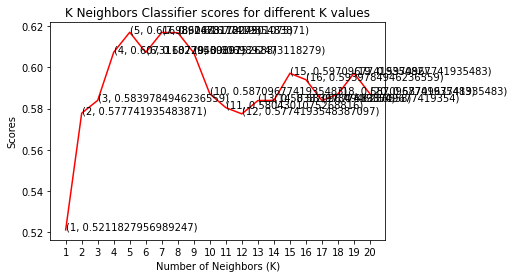

In [315]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [316]:
from sklearn.metrics import confusion_matrix

In [327]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

ValueError: ignored

In [328]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

NameError: ignored

In [ ]:
sns.heatmap(cm, annot=True,cmap='BuPu')